In [2]:
import pandas as pd

df = pd.read_json('datasets/backup.ndjson', lines=True)

In [5]:
df.groupby('ticket_id').count().sort_values('type', ascending=False).head(10)

,type,org,description,coords,photo_url,after_photo,address,timestamp,problem_type_abdul,star,count_reopen,note,state,last_activity
ticket_id,,,,,,,,,,,,,,
2023-K299PL,9,9,9,9,9,9,9,9,9,7,9,8,9,9
2023-DAPM3E,7,7,7,7,7,7,7,7,7,0,7,6,7,7
2023-GEUWAK,7,7,7,7,7,7,7,7,7,0,7,5,7,7
2023-ABZPGM,7,7,7,7,7,7,7,7,7,0,7,6,7,7
2023-EADA33,7,7,7,7,7,7,7,7,7,1,7,6,7,7
43WHPW,6,6,6,6,6,6,6,6,6,0,6,5,6,6
2023-7XB7HU,6,6,6,6,6,6,6,6,6,1,6,5,6,6
2023-KRQFNT,6,6,6,6,6,6,6,6,6,0,6,5,6,6
MY9EG3,6,6,6,6,6,6,6,6,6,3,6,5,6,6


<Axes: xlabel='type', ylabel='Count'>

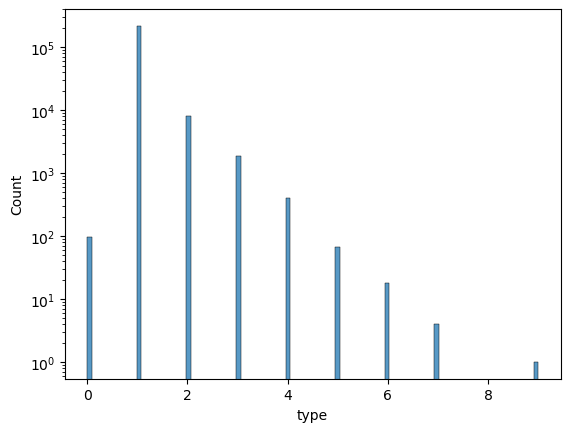

In [9]:
import seaborn as sns

# plot histogram of 
ticket_id_count = df.groupby('ticket_id').count().sort_values('type', ascending=False)['type']
sns.histplot(ticket_id_count, kde=False, bins=100, log_scale=(False, True))


In [4]:
# make all columns title case
df.columns = df.columns.str.title()

In [7]:
df.Count_Reopen.unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5.,  7.,  8., 11., 13., 17., 33.,
       10., nan, 16.,  9., 36., 12., 31., 15., 21., 14., 18., 34.])

In [8]:
# convert 'last_activity' to datetime
df.Last_Activity = pd.to_datetime(df.Last_Activity)

# convert type org to category
df.Org = df.Org.astype('category')

# convert count_reopen to int
df.fillna({'Count_Reopen': 0}, inplace=True)
df.Count_Reopen = df.Count_Reopen.astype('int')

# convert star to int
df.Star = df.Star.astype('float64')

In [17]:
df.to_csv('backup.csv', index=False)

In [11]:
df.to_parquet('backup.parquet')

In [9]:
df

,Type,Org,Description,Ticket_Id,Coords,Photo_Url,After_Photo,Address,Timestamp,Problem_Type_Abdul,Star,Count_Reopen,Note,State,Last_Activity
0,,กรุงเทพมหานคร,พบเห็นคนเช็ดกระจกนำจักรยานโครงการปันปั่น เลขจั...,2023-6T66E8,"[100.55921, 13.72052]",https://storage.googleapis.com/traffy_public_b...,,แยกพระราม 4 แขวง คลองเตย เขตคลองเตย กรุงเทพมหา...,2023-02-28 16:17:35.516745+00:00,[],NaN,0,None,รอรับเรื่อง,2023-02-28 16:17:35.506825+00:00
1,ท่อระบายน้ำ,กรุงเทพมหานคร,พื้นชำระตรงจุดใกล้กับฝาท่อ ตรงบริเวณเกาะกลางถน...,2023-3BFK7U,"[100.56490, 13.75606]",https://storage.googleapis.com/traffy_public_b...,,310 ถนน ดินแดง แขวง ดินแดง เขตดินแดง กรุงเทพมห...,2023-02-28 16:15:44.947614+00:00,[ท่อระบายน้ำ],NaN,0,None,รอรับเรื่อง,2023-02-28 16:15:44.939111+00:00
2,,กรุงเทพมหานคร,รถจอดทิ้ง ซององครักษ์12,2023-9WD749,"[100.51899, 13.78784]",https://storage.googleapis.com/traffy_public_b...,,184 ซอย องครักษ์ 12 แขวง ถนนนครไชยศรี เขตดุสิต...,2023-02-28 16:11:26.626127+00:00,[],NaN,0,None,รอรับเรื่อง,2023-02-28 16:11:26.615394+00:00
3,ถนน,กรุงเทพมหานคร,ปัญหา : มีการก่อสร้าง อาคารในเวลากลางคืน ส่งเส...,HHUWM6,"[100.53738, 13.72894]",https://storage.googleapis.com/traffy_public_b...,,สีลม แขวงสีลม เขตบางรัก กรุงเทพมหานคร 10500 ปร...,2023-02-28 15:58:06.672048+00:00,[ถนน],NaN,0,None,รอรับเรื่อง,2023-02-28 15:58:08.494392+00:00
4,ทางเท้า,กรุงเทพมหานคร,ทางเท้าชำรุด,2023-EBPEF9,"[100.61190, 13.67880]",https://storage.googleapis.com/traffy_public_b...,,8/90 ซอย สุขุมวิท 103 แขวง บางนา เขตบางนา กรุง...,2023-02-28 15:56:34.393074+00:00,[ทางเท้า],NaN,0,None,รอรับเรื่อง,2023-02-28 15:56:34.382048+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241415,ถนน,กรุงเทพมหานคร,แจ้งปัญหา ถนนดินแดง1 ทั้งเส้น ฝาท่อระบายน้ำอยู...,2022-MDCDZZ,"[100.55141, 13.76172]",https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,181/1 ถนน ดินแดง 1 แขวง ดินแดง เขตดินแดง กรุงเ...,2022-06-05 06:39:34.897917+00:00,[ถนน],5.0,0,ขณะนี้อยู่ระหว่างการปรับปรุง ฝาบ่อพักฯและผิวจร...,เสร็จสิ้น,2023-03-01 07:41:05.378924+00:00
241416,ต้นไม้,กรุงเทพมหานคร,จุดอับการมองเห็น เวลาเลี้ยวออกจากซอย ต้นไม้และ...,2022-NXAEQM,"[100.56411, 13.76285]",https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,582 ถนน อโศก - ดินแดง แขวง ดินแดง เขตดินแดง กร...,2022-06-04 00:56:45.470148+00:00,[ต้นไม้],5.0,1,เขตดินแดงขอขอบพระคุณท่านสำหรับข้อมูลที่แจ้งมา ...,เสร็จสิ้น,2023-03-01 07:35:32.983469+00:00
241417,"ถนน,ทางเท้า",กรุงเทพมหานคร,1. ถนนเพชรบุรี เส้นแถวท้ายซอยทองหล่อ รพ. กรุงเ...,2022-86MZ67,"[100.58609, 13.74431]",https://storage.googleapis.com/traffy_public_b...,,2808 ถนน เพชรบุรีตัดใหม่ แขวง บางกะปิ เขตห้วยข...,2022-06-01 04:02:54.882225+00:00,"[ถนน, ทางเท้า]",NaN,0,สำนักการจราจรและขนส่ง กรุงเทพมหานคร (สจส.) เชิ...,ส่งต่อ(ใหม่),2023-03-01 10:18:50.637264+00:00
241418,,กรุงเทพมหานคร,ผู้รัยเหมาเปิดพื้นซ่อมท่อ(ไม่แน่ใจของหน่วยงานใ...,2022-89KQ3U,"[100.51751, 13.68768]",https://storage.googleapis.com/traffy_public_b...,,61 ถ. พระรามที่ 3 แขวง บางโคล่ เขต ยานนาวา กรุ...,2022-05-29 03:15:17.463000+00:00,[],NaN,0,ศูนย์เครื่องมือกล ส่วนก่อสร้างและบูรณะ 1 สำนัก...,กำลังดำเนินการ,2023-03-01 11:01:59.747097+00:00
